<a href="https://colab.research.google.com/github/nupur1262/trying_face_detection/blob/master/Final%20Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##UPLOADING .json FILE

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

##DOWNLOADING DATASET FROM KAGGLE

In [ ]:
!kaggle datasets download -d nupurpahuja09/face-detection

 98% 110M/113M [00:00<00:00, 108MB/s] 
100% 113M/113M [00:00<00:00, 122MB/s]


In [ ]:
!unzip "*.zip"

Archive:  face-detection.zip
  inflating: train_data/dataset-metadata.txt  
  inflating: train_data/me/IMG-20190717-WA0022.jpg  
  inflating: train_data/me/IMG-20190827-WA0058.jpg  
  inflating: train_data/me/IMG-20190916-WA0115.jpg  
  inflating: train_data/me/IMG-20190916-WA0148.jpg  
  inflating: train_data/me/IMG-20190916-WA0164.jpg  
  inflating: train_data/me/IMG-20190916-WA0193.jpg  
  inflating: train_data/me/IMG-20191029-WA0021.jpg  
  inflating: train_data/me/IMG-20191029-WA0022.jpg  
  inflating: train_data/me/IMG-20200101-WA0014.jpg  
  inflating: train_data/me/IMG-20200101-WA0019.jpg  
  inflating: train_data/me/IMG-20200101-WA0021.jpg  
  inflating: train_data/me/IMG-20200101-WA0034.jpg  
  inflating: train_data/me/IMG-20200217-WA0009.jpg  
  inflating: train_data/me/IMG-20200220-WA0030.jpg  
  inflating: train_data/me/IMG-20200227-WA0023.jpeg  
  inflating: train_data/me/IMG-20200227-WA0025.jpeg  
  inflating: train_data/me/IMG-20200227-WA0032.jpeg  
  inflating: train_d

##CREATING DATA THAT CAN BE TRAINED

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [ ]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, )
data = ImageDataBunch.from_folder(Path("train_data"), train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['me', 'not_me']

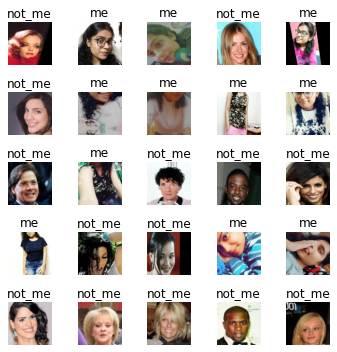

In [ ]:
data.show_batch(rows=5, figsize=(5,5))

##CREATING A MODEL

In [ ]:
alexnet_learn=cnn_learner(data, models.alexnet, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
alexnet_learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.843672,1.183265,0.409091,00:16
1,0.591421,1.472131,0.340909,00:16


In [ ]:
alexnet_learn.fit_one_cycle(2)

In [ ]:
alexnet_learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(alexnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

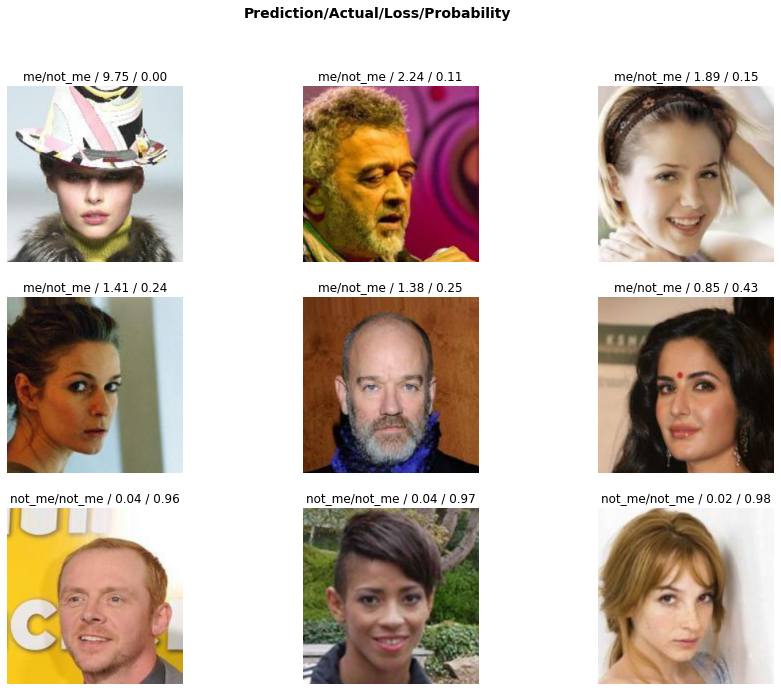

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

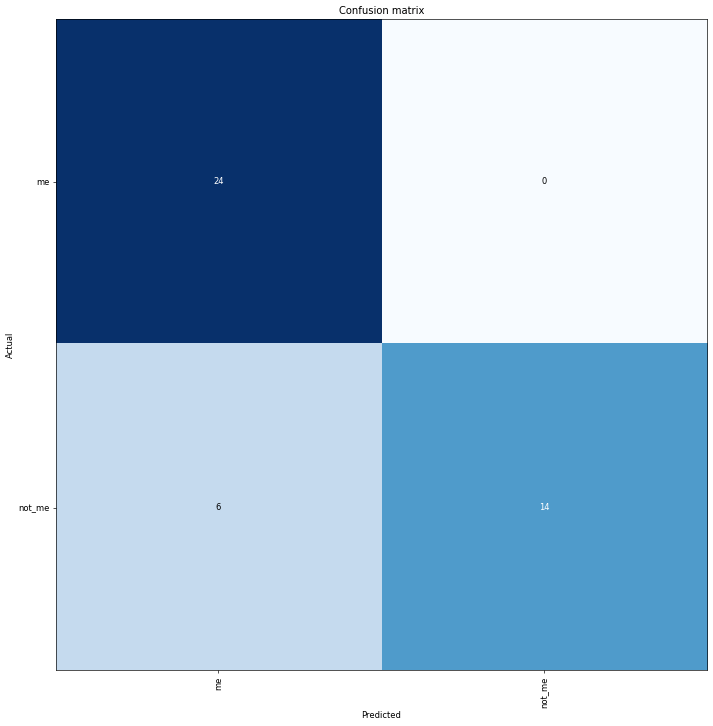

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
alexnet_learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


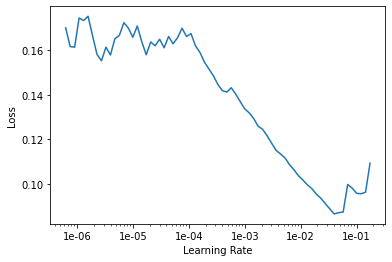

In [ ]:
alexnet_learn.recorder.plot()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/face-detection2/",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/face-detection2"

In [ ]:
alexnet_learn.save(my_dir+"/Stage-1")

In [ ]:
alexnet_learn.load("/content/drive/My Drive/face-detection2/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (178 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
not_me,not_me,not_me,not_me,not_me
Path: train_data;

Valid: LabelList (44 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
me,me,me,not_me,me
Path: train_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=Tr

In [ ]:
alexnet_learn.export(my_dir+"/export.pkl")

In [ ]:
os.makedirs("/content/export_values",exist_ok=True)
my_path = "/content/export_values"
alexnet_learn.save(my_path+"/Stage-1")
alexnet_learn.export(my_path+"/export.pkl")

##UPLOADING MODEL ON KORA DRIVE

In [ ]:
!pip install -U kora

In [ ]:
from kora.drive import upload_public
url2 = upload_public('/content/export_values/export.pkl')
url2

'https://drive.google.com/uc?id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl'

In [ ]:
from kora.drive import upload_public
url2 = upload_public('/content/export_values/Stage-1.pth')
url2

'https://drive.google.com/uc?id=1DPDQkw72TyDJX-CyCvvKsbzBXKMrGiNG'